In [1]:
import pandas as pd 
import numpy as np 
import statsmodels as sm 
import pylab as pl 
from scipy import stats
from sklearn.externals.six import StringIO
from sklearn import preprocessing 
from sklearn import cluster, tree, decomposition
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt 
import pydot 
import seaborn as sns

In [2]:
data = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/travel.csv"

df = pd.read_csv(data)

In [3]:
df.sample(5)

,Unnamed: 0,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
20583,19630081,2014-12-19 13:13:12,13,1,46,157,34868,324.9820,353265,0,...,1,1,21451,6,0,1,6,107,36,64
6751,10527571,2014-06-11 15:08:29,2,3,66,331,9189,136.4541,880781,0,...,0,1,11358,1,0,1,2,50,570,6
28713,17215886,2014-08-03 04:45:37,2,3,149,290,33116,NaN,28923,0,...,0,1,8260,1,1,1,2,50,701,9
47612,31139360,2014-01-29 07:46:42,2,3,66,311,54525,1115.5097,1176542,0,...,2,1,19374,1,0,1,2,50,746,42
41808,16283121,2013-03-27 22:11:16,2,3,205,155,8613,988.4185,49011,0,...,1,1,8250,1,0,5,2,50,628,88


In [4]:
# Get some base information on our dataset
print ("Rows     : " , df.shape[0])
print ("Columns  : " , df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n", df.nunique())

Rows     :  100000
Columns  :  25

Features : 
 ['Unnamed: 0', 'date_time', 'site_name', 'posa_continent', 'user_location_country', 'user_location_region', 'user_location_city', 'orig_destination_distance', 'user_id', 'is_mobile', 'is_package', 'channel', 'srch_ci', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id', 'is_booking', 'cnt', 'hotel_continent', 'hotel_country', 'hotel_market', 'hotel_cluster']

Missing values :   36329

Unique values :  
 Unnamed: 0                   100000
date_time                     99886
site_name                        41
posa_continent                    5
user_location_country           201
user_location_region            779
user_location_city            10779
orig_destination_distance     62206
user_id                       88863
is_mobile                         2
is_package                        2
channel                          11
srch_ci                        1066
srch_co     

In [5]:
df.describe()

,Unnamed: 0,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,63915.000000,1.000000e+05,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.882530e+07,9.838570,2.678150,85.995070,308.636990,27676.391240,1960.661721,6.054383e+05,0.133770,0.248140,...,0.336750,1.111750,14426.32738,2.577290,0.079930,1.487980,3.150920,81.093290,598.848330,49.860370
std,1.086183e+07,11.996426,0.749018,59.292002,208.706581,16768.647409,2228.153377,3.516154e+05,0.340407,0.431936,...,0.734449,0.451602,11036.98122,2.149263,0.271186,1.280262,1.620534,56.111519,510.959297,28.885423
min,1.012000e+03,2.000000,0.000000,0.000000,0.000000,0.000000,0.005600,1.400000e+01,0.000000,0.000000,...,0.000000,0.000000,4.00000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,9.448967e+06,2.000000,3.000000,66.000000,174.000000,12949.000000,312.792100,2.987962e+05,0.000000,0.000000,...,0.000000,1.000000,8267.00000,1.000000,0.000000,1.000000,2.000000,50.000000,158.000000,25.000000
50%,1.881212e+07,2.000000,3.000000,66.000000,314.000000,27655.000000,1131.835300,6.028825e+05,0.000000,0.000000,...,0.000000,1.000000,9145.00000,1.000000,0.000000,1.000000,2.000000,50.000000,591.000000,49.000000
75%,2.825307e+07,15.000000,3.000000,70.000000,385.000000,42328.000000,2542.359350,9.157222e+05,0.000000,0.000000,...,0.000000,1.000000,18784.00000,5.000000,0.000000,2.000000,4.000000,106.000000,701.000000,73.000000
max,3.767009e+07,53.000000,4.000000,239.000000,1025.000000,56507.000000,11965.376100,1.198783e+06,1.000000,1.000000,...,9.000000,8.000000,65035.00000,9.000000,1.000000,120.000000,6.000000,212.000000,2117.000000,99.000000


In [6]:
df.isnull().sum()

Unnamed: 0                       0
date_time                        0
site_name                        0
posa_continent                   0
user_location_country            0
user_location_region             0
user_location_city               0
orig_destination_distance    36085
user_id                          0
is_mobile                        0
is_package                       0
channel                          0
srch_ci                        122
srch_co                        122
srch_adults_cnt                  0
srch_children_cnt                0
srch_rm_cnt                      0
srch_destination_id              0
srch_destination_type_id         0
is_booking                       0
cnt                              0
hotel_continent                  0
hotel_country                    0
hotel_market                     0
hotel_cluster                    0
dtype: int64

In [7]:
correlation_matrix = df.corr()
correlation_matrix

,Unnamed: 0,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
Unnamed: 0,1.000000,0.005119,-0.000626,0.001028,0.000501,-0.002442,-0.003072,0.010300,-0.006413,-0.000838,...,0.000239,-0.004142,0.001031,-0.003505,-0.002716,-0.004491,0.006402,0.003373,0.004371,-0.005887
site_name,0.005119,1.000000,-0.637743,0.159283,0.130818,-0.013471,0.027609,0.030404,-0.005418,0.048820,...,-0.031962,0.016585,0.034895,-0.006934,-0.013460,0.022274,0.201760,0.263167,-0.068316,-0.026689
posa_continent,-0.000626,-0.637743,1.000000,0.179726,-0.034647,0.039227,0.049808,-0.015209,0.016331,-0.093459,...,0.034453,-0.033712,-0.015535,0.037172,0.013319,-0.018952,-0.333578,-0.156578,0.049214,0.018297
user_location_country,0.001028,0.159283,0.179726,1.000000,0.058496,0.122686,0.047689,-0.021091,0.003728,-0.025284,...,0.037101,0.000858,0.013486,0.028888,0.001284,0.003539,-0.063744,0.097624,0.015569,-0.011876
user_location_region,0.000501,0.130818,-0.034647,0.058496,1.000000,0.132457,0.136560,0.002225,0.016982,0.040482,...,0.014009,0.000254,0.022567,0.001376,0.000253,-0.007570,0.043027,-0.050301,0.040367,0.004984
user_location_city,-0.002442,-0.013471,0.039227,0.122686,0.132457,1.000000,0.014178,-0.007989,-0.003741,0.013032,...,0.002638,-0.000694,0.000786,-0.004399,-0.002655,-0.002175,0.007759,-0.001987,0.008558,0.000102
orig_destination_distance,-0.003072,0.027609,0.049808,0.047689,0.136560,0.014178,1.000000,0.017015,-0.059464,0.041991,...,-0.059722,-0.012484,-0.036314,-0.042859,-0.033480,0.009483,0.416180,0.254321,-0.090112,0.003624
user_id,0.010300,0.030404,-0.015209,-0.021091,0.002225,-0.007989,0.017015,1.000000,-0.011439,-0.018901,...,0.002983,-0.001625,0.002716,0.007133,0.001561,0.001355,0.002447,0.008707,-0.002463,0.003202
is_mobile,-0.006413,-0.005418,0.016331,0.003728,0.016982,-0.003741,-0.059464,-0.011439,1.000000,0.046903,...,0.018211,-0.022565,-0.007140,-0.016039,-0.028623,0.008084,-0.024144,-0.029574,0.007644,0.012145
is_package,-0.000838,0.048820,-0.093459,-0.025284,0.040482,0.013032,0.041991,-0.018901,0.046903,1.000000,...,-0.037673,-0.036653,-0.146647,-0.224422,-0.081307,0.126500,0.108993,-0.044426,-0.014636,0.031399


# Heatmap of Correlation Matrix

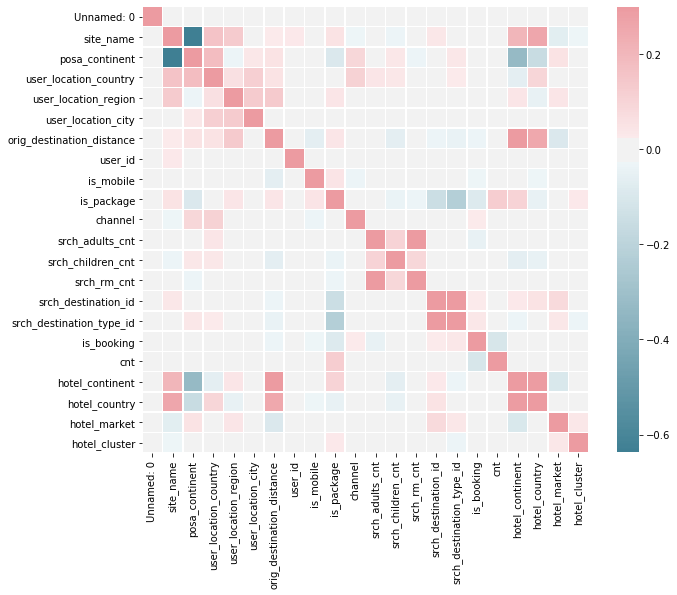

In [8]:
plt.figure(figsize=(10,10))
cmap = sns.diverging_palette(220,10, as_cmap = True)

sns.heatmap(
    correlation_matrix,
    xticklabels=correlation_matrix.columns.values,
    cmap = cmap,
    vmax = .3,
    center = 0,
    square = True,
    linewidths=.5,
    cbar_kws={"shrink" : .82}
    )

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D06A536A88>,
      dtype=object)

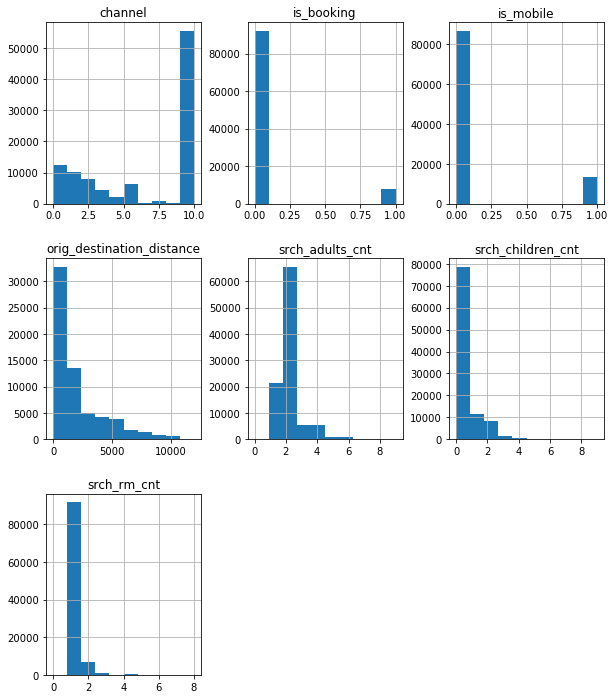

In [9]:
df[['channel', 'is_booking', 'is_mobile', 'orig_destination_distance', 'srch_rm_cnt', 'srch_adults_cnt', 'srch_children_cnt']].hist(figsize=(10,12))

Distribution of booking attempts


In [10]:
 booking_per_user_count = df.groupby("user_id").is_booking.agg(["count"]).reset_index()
 booking_per_user_count.sample(10)

,user_id,count
69966,962290,1
43109,585900,1
83246,1133115,1
45772,621876,1
72869,997673,1
12402,166920,1
85161,1156954,1
83270,1133434,1
5224,69448,1
86634,1173384,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D06989AD08>]],
      dtype=object)

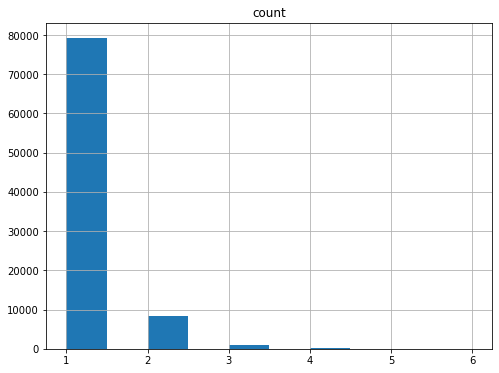

In [11]:
booking_per_user_count[["count"]].hist(figsize=(8,6))

Adding column to data frame

In [12]:
df = df.merge(booking_per_user_count)
df.head()

,Unnamed: 0,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,count
0,24636210,2014-11-03 16:02:28,24,2,77,871,36643,456.1151,792280,0,...,1,8286,1,0,1,0,63,1258,68,2
1,24636169,2014-07-28 23:50:54,24,2,77,871,36643,454.4611,792280,0,...,1,8286,1,0,1,0,63,1258,14,2
2,19837144,2013-03-13 19:25:01,11,3,205,135,38749,232.4737,961995,0,...,1,1842,3,0,1,2,198,786,37,1
3,13066459,2014-10-13 13:20:25,2,3,66,314,48562,4468.2720,495669,0,...,1,8746,1,0,1,6,105,29,22,1
4,4691082,2013-11-05 10:40:34,11,3,205,411,52752,171.6021,106611,0,...,1,6210,3,1,1,2,198,1234,42,2


In [13]:
pd.crosstab(df['srch_adults_cnt'], df['srch_children_cnt'])

srch_children_cnt,0,1,2,3,4,5,6,7,8,9
srch_adults_cnt,,,,,,,,,,
0,174,2,3,2,0,0,0,0,0,0
1,18749,2137,523,117,11,1,9,1,2,0
2,50736,7093,6529,972,208,14,7,1,0,0
3,3645,1131,469,131,27,5,2,2,0,2
4,3933,690,494,77,83,9,4,0,0,0
5,535,131,41,20,6,4,2,0,0,0
6,669,73,53,28,18,13,7,0,0,0
7,99,20,5,8,6,3,0,0,0,0
8,183,12,13,2,6,1,3,2,2,1


Entire 0 row shuld be dropped, number of travelers should by greater then 0, altough its fairly smaall amounts of thoose values.

In [14]:
df = df.drop(df[df['srch_adults_cnt'] + df['srch_children_cnt']==0].index)

In [15]:
pd.crosstab(df['srch_adults_cnt'], df['srch_children_cnt'])

srch_children_cnt,0,1,2,3,4,5,6,7,8,9
srch_adults_cnt,,,,,,,,,,
0,0,2,3,2,0,0,0,0,0,0
1,18749,2137,523,117,11,1,9,1,2,0
2,50736,7093,6529,972,208,14,7,1,0,0
3,3645,1131,469,131,27,5,2,2,0,2
4,3933,690,494,77,83,9,4,0,0,0
5,535,131,41,20,6,4,2,0,0,0
6,669,73,53,28,18,13,7,0,0,0
7,99,20,5,8,6,3,0,0,0,0
8,183,12,13,2,6,1,3,2,2,1


Cleaning datetime

In [16]:
df['srch_co'] = pd.to_datetime(df['srch_co'])
df['srch_ci'] = pd.to_datetime(df['srch_ci'])
df['date_time'] = pd.to_datetime(df['date_time'])
df['date'] = pd.to_datetime(df['date_time'].apply(lambda x: x.date()))

df.sample(10)

,Unnamed: 0,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,count,date
14375,9090658,2014-12-31 17:18:40,24,2,3,50,5703,NaN,457055,0,...,8253,1,0,1,6,70,19,50,1,2014-12-31
48657,33058404,2014-06-22 18:50:44,2,3,66,174,26232,0.2417,441109,0,...,8279,1,0,1,2,50,1230,98,1,2014-06-22
73477,5155837,2014-12-30 23:31:00,18,2,119,0,27731,NaN,116462,0,...,12547,5,0,3,3,106,107,85,1,2014-12-30
34381,13058560,2014-04-22 14:56:09,2,3,32,583,30232,NaN,458292,0,...,8268,1,0,1,2,50,682,71,2,2014-04-22
85690,21328350,2014-03-09 20:25:16,2,3,66,174,53749,313.4754,640968,1,...,12175,6,0,1,2,50,366,28,1,2014-03-09
25333,15141146,2013-07-08 14:58:34,2,3,191,287,11152,NaN,643952,0,...,8808,1,0,2,6,169,28,67,1,2013-07-08
55456,26323283,2014-04-07 19:07:10,2,3,66,351,13013,3769.0206,264100,0,...,8617,6,0,1,6,70,19,11,1,2014-04-07
76802,8216787,2014-09-19 21:38:36,24,2,3,49,19105,NaN,26776,0,...,8282,1,0,1,3,126,232,36,1,2014-09-19
88630,19992239,2014-10-13 08:04:44,2,3,66,220,49937,2057.6497,176265,0,...,8250,1,0,1,2,50,628,54,1,2014-10-13
27064,14330327,2014-08-05 14:17:13,2,3,66,258,10801,846.7235,772628,0,...,12694,5,0,1,2,50,411,95,1,2014-08-05


CHekout dates needs to be  later then checkin date and check in date need to be later than booking, for obvious reasons

In [17]:
df[df['srch_co'] < df['srch_ci']][['srch_co', 'srch_ci']]

,srch_co,srch_ci
34410,2013-05-27,2013-08-20
42412,2015-05-09,2015-08-31


In [18]:
df[df['srch_ci'] < df['date']][['srch_ci', 'date']]

,srch_ci,date
7138,2014-01-05,2014-01-07
14931,2014-10-13,2014-10-14
18778,2014-06-11,2014-11-10
22722,2014-02-11,2014-10-09
25886,2014-03-10,2014-09-15
26795,2014-09-12,2014-12-02
29591,2014-08-02,2014-08-23
33886,2013-01-16,2013-01-17
33887,2014-03-03,2014-03-04
33888,2013-01-21,2013-01-22


These entries could be erros, there is only few of them co it will not affect further model

# Feature Engineering

In [19]:
def duration(row):
    '''Returns the day between checkin and checkout'''
    delta = (row['srch_co'] - row['srch_ci']) / np.timedelta64(1,'D')
    if delta <= 0:
        return np.nan
    else:
        return delta 

In [20]:
def days_in_advance(row):
    '''Informs us how much earlier trip was booked'''
    delta = (row['srch_ci'] - row['date']) / np.timedelta64(1,"D")
    if delta < 0:
        return np.nan
    else:
        return delta 


Using both functions to create new columns 

In [21]:
df['duration'] = df.apply(duration, axis = 1)

In [22]:
df['days_in_advance'] = df.apply(days_in_advance, axis = 1)

In [23]:
df.sample(5)

,Unnamed: 0,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,count,date,duration,days_in_advance
37827,713377,2014-10-27 20:47:21,44,2,119,0,27731,NaN,1157051,0,...,0,1,3,151,1486,26,1,2014-10-27,4.0,76.0
3789,20344354,2013-03-05 17:02:01,2,3,66,174,24889,6902.2958,22943,0,...,0,1,3,99,1033,64,1,2013-03-05,4.0,12.0
19961,26941174,2014-01-17 09:11:26,2,3,66,196,2428,18.4932,885298,1,...,0,1,2,50,191,91,1,2014-01-17,2.0,0.0
17296,18811779,2014-07-19 07:38:41,2,3,66,351,21609,248.6432,537083,1,...,0,1,2,198,750,40,2,2014-07-19,1.0,0.0
15762,24186221,2014-02-19 19:24:06,34,3,205,135,36086,2638.7166,342404,1,...,0,1,4,128,1400,31,1,2014-02-19,6.0,17.0


## Analysis of booking channels

In [24]:
 booking_channels = df.groupby('channel').is_booking.agg(['mean','count']).reset_index().rename(columns={"mean": "booking_rate","count":"num_of_bookings"})
 booking_channels

,channel,booking_rate,num_of_bookings
0,0,0.072184,12482
1,1,0.069568,10249
2,2,0.060583,7824
3,3,0.060482,4398
4,4,0.120438,2192
5,5,0.094533,6146
6,6,0.068323,161
7,7,0.043263,809
8,8,0.051852,270
9,9,0.085365,55280


In [25]:
def stats_comparison(i):
    ''' Returns breakdownd of stats per channel, version corrected by new pandas version'''
    df.groupby(i).is_booking.agg(["mean","count"]).reset_index().rename(columns={
        "mean" : "average",
        "count" : "bookings" 
    })
    cat = df.groupby(i).is_booking.agg(["mean","count"]).reset_index().rename(columns={
        "mean" : "sub_average",
        "count" : "sub_bookings"
    })
    cat['overall_average'] = df["is_booking"].mean()
    cat['overall_bookings'] = df["is_booking"].count()
    #returns the sum of other types of bookings
    cat['rest_bookings'] = cat['overall_bookings'] - cat['sub_bookings']
    #returns the average of other bookings
    cat['rest_average'] = (cat['overall_bookings']*cat['overall_average'] - cat['sub_bookings']*cat['sub_average'])/cat['rest_bookings']
     # A z-score is the number of standard deviations from the mean a data point is.
    # We get the z-scores for channel average compared to the average of the others (excluding the channel we are analyzing)
    cat['z_score'] = (cat['sub_average']-cat['rest_average'])/np.sqrt(cat['overall_average']*(1-cat['overall_average'])*(1/cat['sub_bookings']+1/cat['rest_bookings']))
    cat['prob'] = np.around(stats.norm.cdf(cat.z_score), decimals = 10)
    cat['significant'] = [(lambda x: 1 if x > 0.9 else -1 if x < 0.1 else 0)(i) for i in cat['prob']]
    return cat



In [26]:
stats_comparison('channel')

,channel,sub_average,sub_bookings,overall_average,overall_bookings,rest_bookings,rest_average,z_score,prob,significant
0,0,0.072184,12482,0.079949,99826,87344,0.081059,-3.419680,3.134747e-04,-1
1,1,0.069568,10249,0.079949,99826,89577,0.081137,-4.090773,2.149690e-05,-1
2,2,0.060583,7824,0.079949,99826,92002,0.081596,-6.579173,0.000000e+00,-1
3,3,0.060482,4398,0.079949,99826,95428,0.080846,-4.868548,5.621000e-07,-1
4,4,0.120438,2192,0.079949,99826,97634,0.079040,7.067474,1.000000e+00,1
5,5,0.094533,6146,0.079949,99826,93680,0.078992,4.351672,9.999932e-01,1
6,6,0.068323,161,0.079949,99826,99665,0.079968,-0.544360,2.930970e-01,0
7,7,0.043263,809,0.079949,99826,99017,0.080249,-3.863018,5.599740e-05,-1
8,8,0.051852,270,0.079949,99826,99556,0.080025,-1.704595,4.413499e-02,-1
9,9,0.085365,55280,0.079949,99826,44546,0.073228,7.028968,1.000000e+00,1


# Clustering

Features

In [27]:
features = ['duration','days_in_advance','orig_destination_distance', 'is_mobile','is_package','srch_adults_cnt','srch_children_cnt','srch_rm_cnt']


In [28]:
city_data = df.dropna(axis=0)[features + ["user_location_city"]]
city_groups = city_data.groupby('user_location_city').mean().reset_index().dropna(axis=0)

In [29]:
city_data.head(5)

,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,user_location_city
0,4.0,42.0,456.1151,0,1,2,0,1,36643
1,5.0,29.0,454.4611,0,1,1,0,1,36643
2,1.0,0.0,232.4737,0,0,2,0,1,38749
3,7.0,172.0,4468.2720,0,1,2,0,1,48562
4,1.0,2.0,171.6021,0,0,2,0,1,52752


In [30]:
city_groups.head(5)

,user_location_city,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt
0,0,2.0000,78.50,2315.83625,0.0000,0.25,1.7500,0.00,1.0
1,3,4.5625,92.25,3550.01750,0.0625,0.25,1.9375,0.50,1.0
2,7,14.0000,58.00,5994.86400,0.0000,1.00,2.0000,0.00,1.0
3,14,7.0000,35.75,5342.81910,0.0000,0.00,2.0000,0.75,1.0
4,21,5.0000,31.50,2165.76890,0.0000,0.50,1.5000,1.00,1.0


In [31]:
city_groups.describe()

,user_location_city,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt
count,4530.000000,4530.000000,4530.000000,4530.000000,4530.000000,4530.000000,4530.000000,4530.000000,4530.000000
mean,28369.643046,3.367941,56.215850,1794.387378,0.135038,0.249462,2.072927,0.363874,1.120467
std,16463.014341,2.083305,46.313428,1610.123123,0.226925,0.302133,0.654947,0.536018,0.369764
min,0.000000,1.000000,0.000000,0.907100,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13976.000000,2.125000,25.000000,723.247600,0.000000,0.000000,1.866667,0.000000,1.000000
50%,28581.000000,3.000000,47.670833,1434.191950,0.000000,0.166667,2.000000,0.217391,1.000000
75%,42572.750000,4.000000,72.000000,2247.522889,0.191489,0.372793,2.136057,0.500000,1.102847
max,56507.000000,40.000000,366.000000,11428.188600,1.000000,1.000000,9.000000,8.000000,8.000000


To big  difference between data, we could drop the 'duration' or try some standarization

In [32]:
city_groups_standarization_attempt = city_groups.copy()

In [33]:
cols = ['duration', 'days_in_advance', 'orig_destination_distance',	'is_mobile', 'is_package', 'srch_adults_cnt', 'srch_children_cnt','srch_rm_cnt']
city_groups_standarization_attempt[cols] = preprocessing.scale(city_groups_standarization_attempt[cols])


In [34]:
city_groups_standarization_attempt.head(5)

,user_location_city,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt
0,0,-0.656693,0.481213,0.323892,-0.595145,0.001781,-0.493112,-0.678922,-0.325831
1,3,0.573460,0.778136,1.090490,-0.319693,0.001781,-0.206798,0.253986,-0.325831
2,7,5.104022,0.038528,2.609080,-0.595145,2.484407,-0.111360,-0.678922,-0.325831
3,14,1.743605,-0.441948,2.204070,-0.595145,-0.825760,-0.111360,0.720440,-0.325831
4,21,0.783486,-0.533724,0.230680,-0.595145,0.829323,-0.874864,1.186894,-0.325831


In [35]:
city_groups_standarization_attempt.describe()

,user_location_city,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt
count,4530.000000,4.530000e+03,4.530000e+03,4.530000e+03,4.530000e+03,4.530000e+03,4.530000e+03,4.530000e+03,4.530000e+03
mean,28369.643046,-7.580397e-17,6.847601e-17,5.459209e-18,-4.995268e-16,6.484879e-17,-6.428020e-16,4.627492e-16,6.140048e-16
std,16463.014341,1.000110e+00,1.000110e+00,1.000110e+00,1.000110e+00,1.000110e+00,1.000110e+00,1.000110e+00,1.000110e+00
min,0.000000,-1.136753e+00,-1.213947e+00,-1.114001e+00,-5.951453e-01,-8.257604e-01,-3.165378e+00,-6.789217e-01,-3.258313e-01
25%,13976.000000,-5.966856e-01,-6.740874e-01,-6.653268e-01,-5.951453e-01,-8.257604e-01,-3.149612e-01,-6.789217e-01,-3.258313e-01
50%,28581.000000,-1.766334e-01,-1.845245e-01,-2.237315e-01,-5.951453e-01,-2.740658e-01,-1.113600e-01,-2.733095e-01,-3.258313e-01
75%,42572.750000,3.034262e-01,3.408491e-01,2.814602e-01,2.487926e-01,4.082462e-01,9.639947e-02,2.539864e-01,-4.765868e-02
max,56507.000000,1.758557e+01,6.689601e+00,5.983930e+00,3.812086e+00,2.484407e+00,1.057770e+01,1.424761e+01,1.860725e+01


# K-MEANS

In [66]:
km = cluster.KMeans(n_clusters=3, max_iter=300,random_state=None)
city_groups_standarization_attempt['cluster'] = km.fit_predict(city_groups_standarization_attempt[features])

# PCA

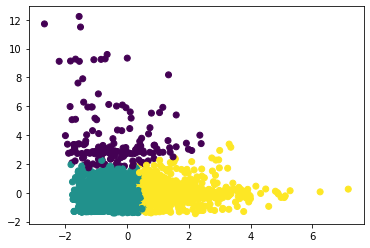

In [67]:
pca = decomposition.PCA(n_components=2,whiten=True)
city_groups_standarization_attempt["X"] = pca.fit_transform(city_groups_standarization_attempt[features])[:, 0]
city_groups_standarization_attempt["Y"] = pca.fit_transform(city_groups_standarization_attempt[features])[:, 1]
plt.scatter(city_groups_standarization_attempt["X"], city_groups_standarization_attempt["Y"], c=city_groups_standarization_attempt['cluster'])
plt.show()

I wast testing with 3 and more clusters but the 3 seems to work best. With 3+ clusters there was to many overlapping

In [68]:
city_groups.merge(city_groups_standarization_attempt[['user_location_city', 'cluster']]).groupby('cluster').mean()

,user_location_city,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt
cluster,,,,,,,,,
0,30907.850932,3.042961,55.256884,1540.887311,0.136077,0.187474,4.189130,0.562474,2.447412
1,28061.836890,2.752480,41.068424,1345.452203,0.143750,0.176655,1.985549,0.367270,1.072572
2,28921.482094,5.269714,101.980727,3184.030066,0.108645,0.477915,2.023241,0.324284,1.068546


In [69]:
city_groups_standarization_attempt['cluster'].unique()

array([1, 2, 0])

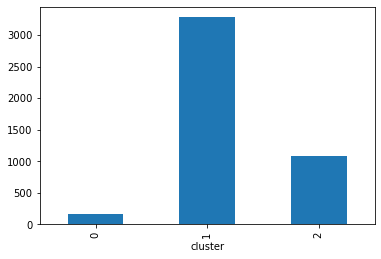

In [70]:
city_groups_standarization_attempt.groupby('cluster').user_location_city.agg('count').plot(kind="bar")

In [71]:
city_groups_standarization_attempt[features].shape

(4530, 8)

# Elbow Method

In [75]:
from sklearn.cluster import KMeans

sum_of_squared_distances = []

K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k,max_iter=300,random_state=None)
    km =km.fit(city_groups_standarization_attempt[features])
    sum_of_squared_distances.append(km.inertia_)



# Elbow Plot

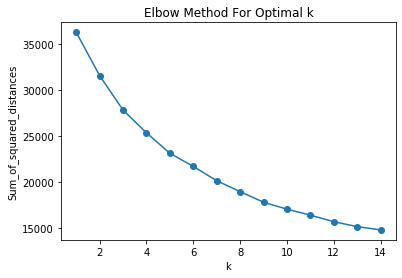

In [77]:

plt.plot(K, sum_of_squared_distances, marker='o')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Inconclusive, no bend point.

# Silhouette Coeff

In [78]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans


In [80]:
for n_cluster in range(2,11):
    kmeans = KMeans(n_clusters=n_cluster, max_iter=300, random_state=None).fit(city_groups_standarization_attempt[features])
    label = kmeans.labels_
    sil_coef = silhouette_score(city_groups_standarization_attempt[features],label,metric="euclidean")
    print(f"For n_clusters={n_cluster}, The Silhouette Coeff is {sil_coef}")


For n_clusters=2, The Silhouette Coeff is 0.2411733228304949
For n_clusters=3, The Silhouette Coeff is 0.2546259626953947
For n_clusters=4, The Silhouette Coeff is 0.25388577909290627
For n_clusters=5, The Silhouette Coeff is 0.2608463497483299
For n_clusters=6, The Silhouette Coeff is 0.2662945333496323
For n_clusters=7, The Silhouette Coeff is 0.1597718996986994
For n_clusters=8, The Silhouette Coeff is 0.16263347622924246
For n_clusters=9, The Silhouette Coeff is 0.1728885291110794
For n_clusters=10, The Silhouette Coeff is 0.17988267868948596


# Attempt with K=5 just for the kicks

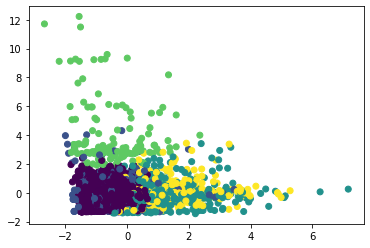

In [81]:
km = cluster.KMeans(n_clusters=5, max_iter=300,random_state=None)
city_groups_standarization_attempt['cluster'] = km.fit_predict(city_groups_standarization_attempt[features])

pca = decomposition.PCA(n_components=2,whiten=True)
city_groups_standarization_attempt["X"] = pca.fit_transform(city_groups_standarization_attempt[features])[:, 0]
city_groups_standarization_attempt["Y"] = pca.fit_transform(city_groups_standarization_attempt[features])[:, 1]
plt.scatter(city_groups_standarization_attempt["X"], city_groups_standarization_attempt["Y"], c=city_groups_standarization_attempt['cluster'])
plt.show()



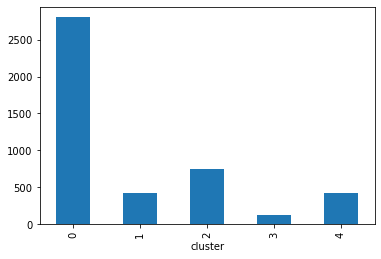

In [82]:
city_groups_standarization_attempt.groupby('cluster').user_location_city.agg('count').plot(kind='bar')

In [83]:
city_groups.merge(city_groups_standarization_attempt[['user_location_city', 'cluster']]).groupby('cluster').mean()

,user_location_city,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt
cluster,,,,,,,,,
0,28212.987143,2.784953,43.193310,1353.407519,0.084175,0.144229,1.994921,0.367040,1.076323
1,27759.522353,3.004884,45.537543,1285.946388,0.692880,0.254255,2.041460,0.396915,1.081500
2,28284.017380,5.112945,78.949872,1867.485102,0.061483,0.746162,2.021614,0.319392,1.081679
3,31298.325581,2.984884,56.175517,1367.409901,0.058463,0.153876,4.323127,0.453811,2.590181
4,29267.273364,4.608162,112.294232,5185.121081,0.065489,0.093885,2.025954,0.360985,1.072769


It could help in creation of border values for each clusters, but i Would stay with 3 main clusters. Seem more elegant.